In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Import data

In [2]:
df = pd.read_csv('data exports/export-10-31-2020.csv')
df.shape

(178, 11)

In [3]:
df.head()

,ID,Date,Theme,Num_People,Winner_Movie_ID,Voting_Data_ID,People_ID,Name,Movie_ID,Title,Test
0,1,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,1,Terminator 2,0
1,2,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,2,Inglorious Basterds,0
2,3,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,3,Texas Chainsaw Massacre,0
3,4,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,4,Avengers Endgame,0
4,5,2020-08-01 17:04:39,Iconic Villains,3,3,1,3,Pato,5,Misery,0


In [5]:
df.dtypes

ID                  int64
Date               object
Theme              object
Num_People          int64
Winner_Movie_ID     int64
Voting_Data_ID      int64
People_ID           int64
Name               object
Movie_ID            int64
Title              object
Test                int64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

ID                          int64
Date               datetime64[ns]
Theme                      object
Num_People                  int64
Winner_Movie_ID             int64
Voting_Data_ID              int64
People_ID                   int64
Name                       object
Movie_ID                    int64
Title                      object
Test                        int64
dtype: object

In [7]:
df.head()

,ID,Date,Theme,Num_People,Winner_Movie_ID,Voting_Data_ID,People_ID,Name,Movie_ID,Title,Test
0,1,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,1,Terminator 2,0
1,2,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,2,Inglorious Basterds,0
2,3,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,3,Texas Chainsaw Massacre,0
3,4,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,4,Avengers Endgame,0
4,5,2020-08-01 17:04:39,Iconic Villains,3,3,1,3,Pato,5,Misery,0


## Explore

In [8]:
df['Name'].nunique()

3

In [9]:
df.groupby('Name')['Movie_ID'].nunique()

Name
Britt    44
Nico     44
Pato     47
Name: Movie_ID, dtype: int64

#### Add Title column to winning movies

In [21]:
df['Winning_Title'] = df['Winner_Movie_ID'].map(df.groupby('Movie_ID')['Title'].first())
df.head()

,ID,Date,Theme,Num_People,Winner_Movie_ID,Voting_Data_ID,People_ID,Name,Movie_ID,Title,Test,Winning_Title
0,1,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,1,Terminator 2,0,Texas Chainsaw Massacre
1,2,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,2,Inglorious Basterds,0,Texas Chainsaw Massacre
2,3,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,3,Texas Chainsaw Massacre,0,Texas Chainsaw Massacre
3,4,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,4,Avengers Endgame,0,Texas Chainsaw Massacre
4,5,2020-08-01 17:04:39,Iconic Villains,3,3,1,3,Pato,5,Misery,0,Texas Chainsaw Massacre


In [22]:
winning_movie_counts = df.groupby('Voting_Data_ID')['Winning_Title'].first().reset_index()

In [23]:
winning_movie_counts

,Voting_Data_ID,Winning_Title
0,1,Texas Chainsaw Massacre
1,2,Avengers Endgame
2,3,The Big Short
3,4,Hateful Eight
4,5,NaN
5,6,Shutter Island
6,8,The Lighthouse
7,9,The Hobbit
8,10,22 Jump Street
9,11,Signs


### Has any film won more than once?

In [25]:
winning_movie_counts.groupby('Winning_Title')['Voting_Data_ID'].nunique()

Winning_Title
22 Jump Street              1
Avengers Endgame            1
Batman (1989)               1
Borat                       1
Dodgeball                   1
Due Date                    1
Harry Potter                1
Hateful Eight               1
Haunt                       1
Hobbit 2                    1
Inception                   1
Invictus                    1
Jurassic World              1
Justice League: Doom        1
Misery                      1
Narcos & Narcos Mexico      1
School of Rock              1
Shutter Island              1
Signs                       1
Talladega Nights            1
Texas Chainsaw Massacre     1
The Big Short               1
The Founder                 1
The Grand Budapest Hotel    1
The Hobbit                  1
The Lighthouse              1
The Purge                   1
The Purge 2                 1
The Wire                    1
Name: Voting_Data_ID, dtype: int64

#### Add a winning person (winner) column

In [28]:
df['Winner'] = df['Winning_Title'].map(df.groupby('Title')['Name'].first())
df.head()

,ID,Date,Theme,Num_People,Winner_Movie_ID,Voting_Data_ID,People_ID,Name,Movie_ID,Title,Test,Winning_Title,Winner
0,1,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,1,Terminator 2,0,Texas Chainsaw Massacre,Britt
1,2,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,2,Inglorious Basterds,0,Texas Chainsaw Massacre,Britt
2,3,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,3,Texas Chainsaw Massacre,0,Texas Chainsaw Massacre,Britt
3,4,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,4,Avengers Endgame,0,Texas Chainsaw Massacre,Britt
4,5,2020-08-01 17:04:39,Iconic Villains,3,3,1,3,Pato,5,Misery,0,Texas Chainsaw Massacre,Britt


In [33]:
winners = df.loc[df['Voting_Data_ID'] != 5 ].groupby('Voting_Data_ID')['Winner'].first().reset_index()

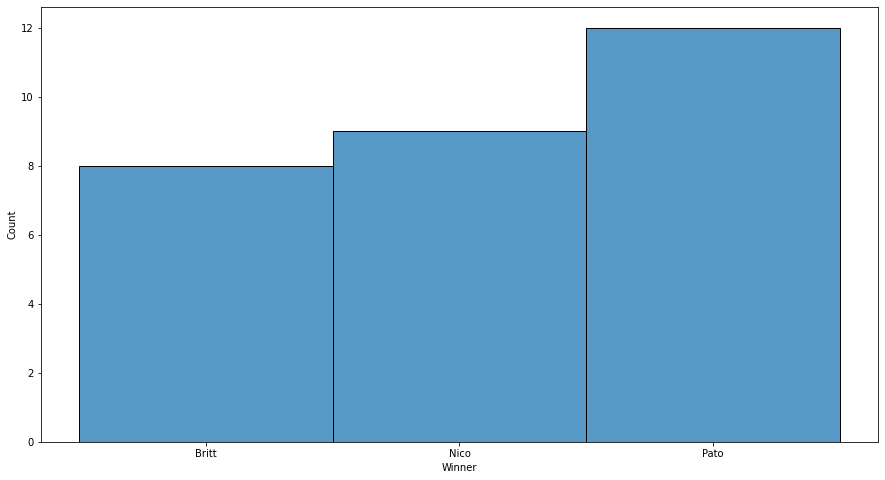

In [34]:
plt.figure(figsize = (15,8))


sns.histplot(x = 'Winner',
             data = winners)

plt.show()